In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
file_paths = [
    r'C:\Users\Acer\Documents\Bismillah Skripsi\Datanya\Panasonic 18650PF Data\0degC\Drive Cycles\05-30-17_20.16 0degC_Cycle_2_Pan18650PF.csv',
    r'C:\Users\Acer\Documents\Bismillah Skripsi\Datanya\Panasonic 18650PF Data\10degC\Drive Cycles\03-28-17_18.18 10degC_Cycle_2_Pan18650PF.csv',
    r'c:\Users\Acer\Documents\Bismillah Skripsi\Datanya\Panasonic 18650PF Data\Panasonic 18650PF Data\25degC\Drive cycles\03-19-17_03.25 25degC_Cycle_2_Pan18650PF.csv'
]

def preprocess_dataset(dataset_path):
    df = pd.read_csv(dataset_path, usecols=['TimeStamp', 'Voltage', 'Current', 'Battery_Temp_degC', 'Ah'], skiprows=0)
    df['TimeStamp'] = pd.to_datetime(df['TimeStamp'])
    df = df.set_index('TimeStamp')
    df_resampled = df.resample('1S').mean()
    df_resampled = df_resampled.rename(columns={'Battery_Temp_degC': 'Temperature'})
    
    # Hitung State of Charge (SOC)
    df_resampled['SOC'] = df_resampled['Ah'] / df_resampled['Ah'].max()
    
    # Menghilangkan data yang hilang (missing values)
    df_resampled = df_resampled.dropna()
    
    # Urutkan data berdasarkan kolom 'TimeStamp'
    df_resampled = df_resampled.sort_values(by='TimeStamp')
    
    # Setel ulang indeks dengan benar
    df_resampled.reset_index(drop=True, inplace=True)
    
    # Sisipkan langkah waktu dengan benar
    df_resampled.insert(0, 'Step Time', range(1, len(df_resampled) + 1))
    
    return df_resampled


dfs = [preprocess_dataset(file_path) for file_path in file_paths]

C:\Users\Acer\AppData\Local\Temp\ipykernel_17488\972744624.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TimeStamp'] = pd.to_datetime(df['TimeStamp'])
C:\Users\Acer\AppData\Local\Temp\ipykernel_17488\972744624.py:11: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df.resample('1S').mean()
C:\Users\Acer\AppData\Local\Temp\ipykernel_17488\972744624.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TimeStamp'] = pd.to_datetime(df['TimeStamp'])
C:\Users\Acer\AppData\Local\Temp\ipykernel_17488\972744624.py:11: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df.resample

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\Acer\\Documents\\Bismillah Skripsi\\Datanya\\Panasonic 18650PF Data\\Panasonic 18650PF Data\\25degC\\Drive cycles\\03-19-17_03.25 25degC_Cycle_2_Pan18650PF.csv'

C:\Users\Acer\AppData\Local\Temp\ipykernel_20704\972744624.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TimeStamp'] = pd.to_datetime(df['TimeStamp'])
C:\Users\Acer\AppData\Local\Temp\ipykernel_20704\972744624.py:11: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df.resample('1S').mean()
C:\Users\Acer\AppData\Local\Temp\ipykernel_20704\972744624.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TimeStamp'] = pd.to_datetime(df['TimeStamp'])
C:\Users\Acer\AppData\Local\Temp\ipykernel_20704\972744624.py:11: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df.resample

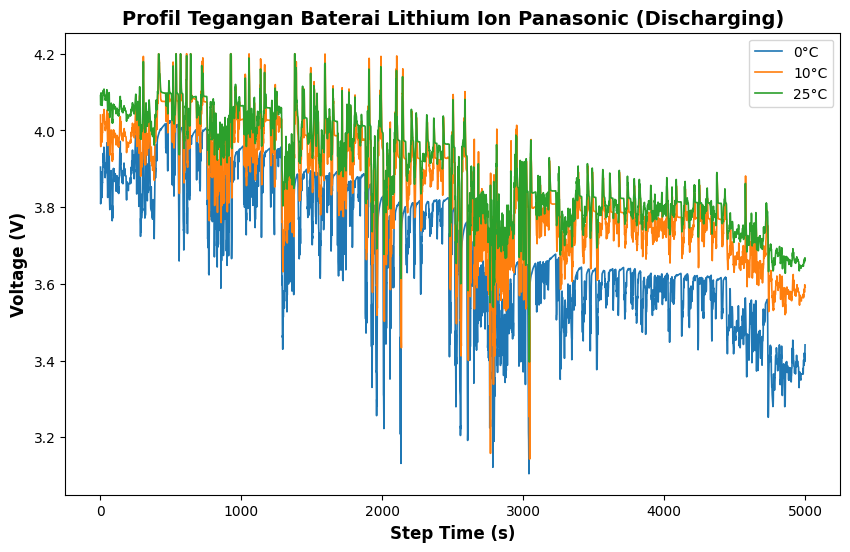

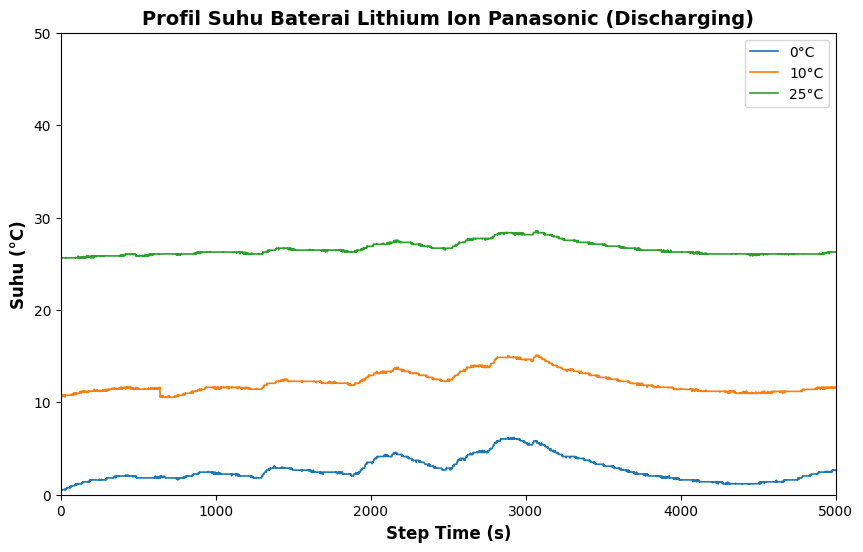

In [ ]:
dfs = [preprocess_dataset(file_path) for file_path in file_paths]

plt.figure(figsize=(10, 6))
for i, df in enumerate(dfs):
    df_filtered = df[(df['Step Time'] >= 1) & (df['Step Time'] <= 5000)]
    
    if i == 0:
        label = '0°C'
    elif i == 1:
        label = '10°C'
    elif i == 2:
        label = '25°C'
    
    # Plot data
    plt.plot(df_filtered['Step Time'], df_filtered['Voltage'], label=label, linewidth=1.2)

plt.xlabel('Step Time (s)', fontsize=12, fontweight='bold')
plt.ylabel('Voltage (V)', fontsize=12, fontweight='bold')
plt.title('Profil Tegangan Baterai Lithium Ion Panasonic (Discharging)', fontsize=14, fontweight='bold')
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))
for i, df in enumerate(dfs):
    df_filtered = df[(df['Step Time'] >= 1) & (df['Step Time'] <= 5000)]
    
    if i == 0:
        label = '0°C'
    elif i == 1:
        label = '10°C'
    elif i == 2:
        label = '25°C'
    
    plt.plot(df_filtered['Step Time'], df_filtered['Temperature'], label=label, linewidth=1.2)

plt.xlabel('Step Time (s)', fontsize=12, fontweight='bold')
plt.ylabel('Suhu (°C)', fontsize=12, fontweight='bold')
plt.title('Profil Suhu Baterai Lithium Ion Panasonic (Discharging)', fontsize=14, fontweight='bold')
plt.legend()


plt.xlim(0, 5000)  
plt.ylim(0, 50)    

plt.show()

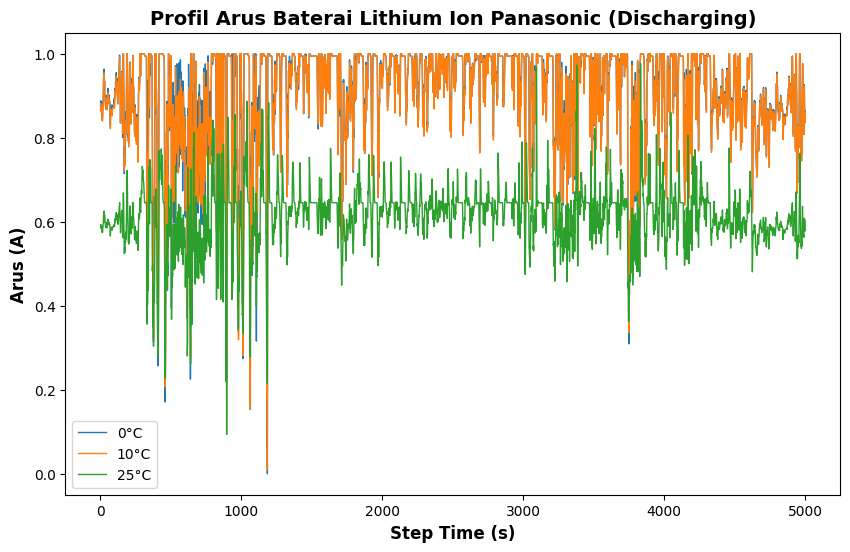

In [38]:
plt.figure(figsize=(10, 6))
for i, df in enumerate(dfs):
    df_filtered = df[(df['Step Time'] >= 1) & (df['Step Time'] <= 5000)]
    
    if i == 0:
        label = '0°C'
        alpha_val = 1.0  # Tidak transparan
        linewidth_val = 1.0  # Ketebalan garis untuk 0°C
        linestyle_val = '-'  # Pola garis solid
    elif i == 1:
        label = '10°C'
        alpha_val = 1.0  # Tidak transparan
        linewidth_val = 1.0  # Ketebalan garis untuk 10°C
        linestyle_val = '-'  # Pola garis putus-putus
    elif i == 2:
        label = '25°C'
        alpha_val = 1.0  # Transparan
        linewidth_val = 1  # Ketebalan garis untuk 25°C
        linestyle_val = '-'  # Pola garis titik-titik
        
    plt.plot(df_filtered['Step Time'], df_filtered['Current'], label=label, linewidth=linewidth_val, linestyle=linestyle_val, alpha=alpha_val)

plt.xlabel('Step Time (s)', fontsize=12, fontweight='bold')
plt.ylabel('Arus (A)', fontsize=12, fontweight='bold')
plt.title('Profil Arus Baterai Lithium Ion Panasonic (Discharging)', fontsize=14, fontweight='bold')
plt.legend()
plt.show()

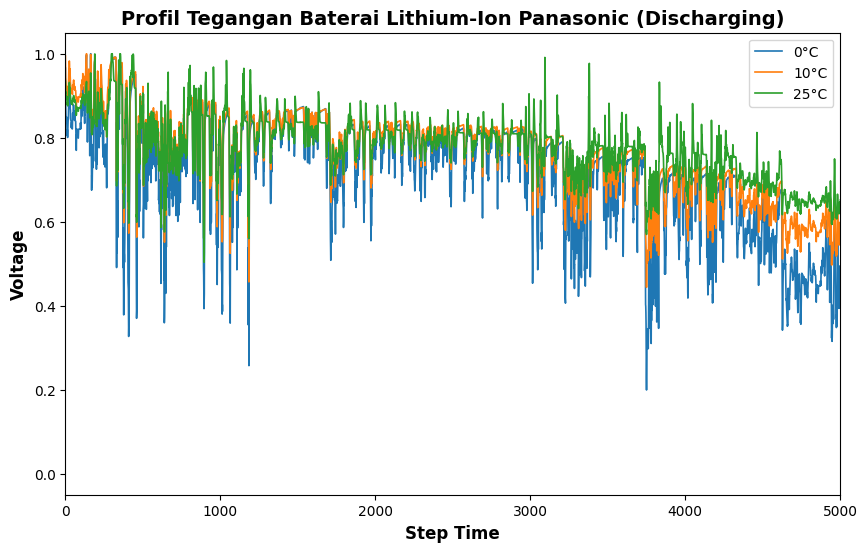

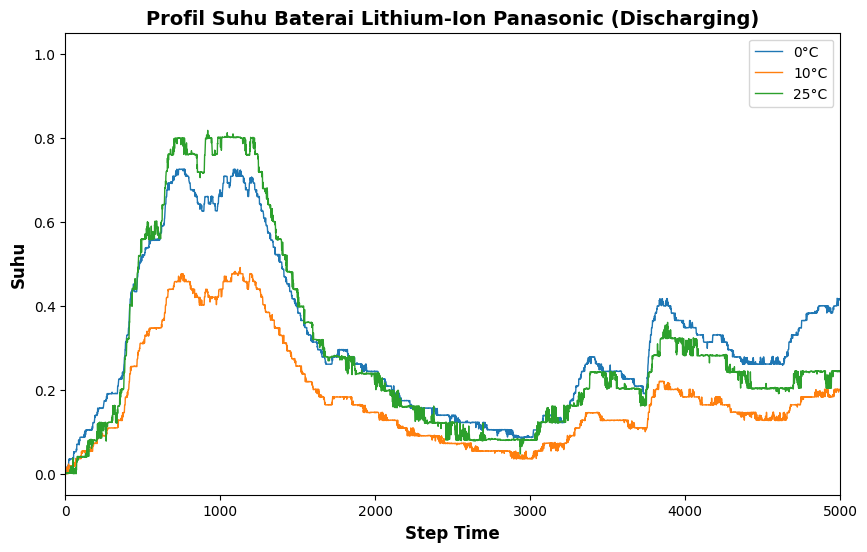

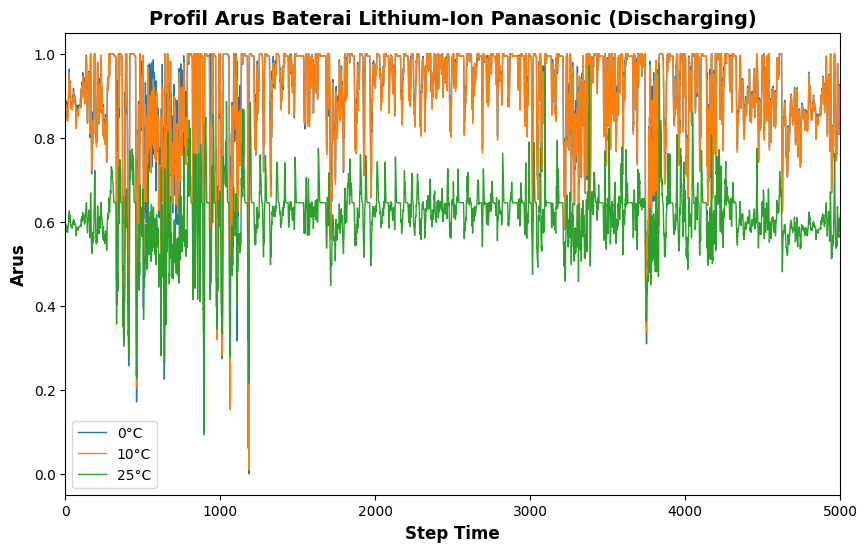

In [3]:
dfs = [pd.read_csv(file_path) for file_path in file_paths]

combined_df = pd.concat(dfs)

plt.figure(figsize=(10, 6))
for i, df in enumerate(dfs):
    if i == 0:
        label = '0°C'
    elif i == 1:
        label = '10°C'
    elif i == 2:
        label = '25°C'
    plt.plot(df['Step Time'], df['Voltage'], label=label, linewidth=1.2)

plt.xlabel('Step Time', fontsize=12, fontweight='bold')
plt.ylabel('Voltage', fontsize=12, fontweight='bold')
plt.title('Profil Tegangan Baterai Lithium-Ion Panasonic (Discharging)', fontsize=14, fontweight='bold')
plt.legend()
plt.xlim(0, 5000)  # Menambahkan batas sumbu x
plt.show()


dfs = [pd.read_csv(file_path) for file_path in file_paths]

combined_df = pd.concat(dfs)

plt.figure(figsize=(10, 6))
for i, df in enumerate(dfs):
    if i == 0:
        label = '0°C'
    elif i == 1:
        label = '10°C'
    elif i == 2:
        label = '25°C'
    plt.plot(df['Step Time'], df['Temperature'], label=label, linewidth=1)

plt.xlabel('Step Time', fontsize=12, fontweight='bold')
plt.ylabel('Suhu', fontsize=12, fontweight='bold')
plt.title('Profil Suhu Baterai Lithium-Ion Panasonic (Discharging)', fontsize=14, fontweight='bold')
plt.legend()
plt.xlim(0, 5000)  # Menambahkan batas sumbu x
plt.show()

dfs = [pd.read_csv(file_path) for file_path in file_paths]

combined_df = pd.concat(dfs)

plt.figure(figsize=(10, 6))
for i, df in enumerate(dfs):
    if i == 0:
        label = '0°C'
        linestyle = '-'
    elif i == 1:
        label = '10°C'
        linestyle = '-'
    elif i == 2:
        label = '25°C'
        linestyle = '-'
    plt.plot(df['Step Time'], df['Current'], label=label, linewidth=1, linestyle=linestyle)

plt.xlabel('Step Time', fontsize=12, fontweight='bold')
plt.ylabel('Arus', fontsize=12, fontweight='bold')
plt.title('Profil Arus Baterai Lithium-Ion Panasonic (Discharging)', fontsize=14, fontweight='bold')
plt.legend()
plt.xlim(0, 5000)  
plt.show()


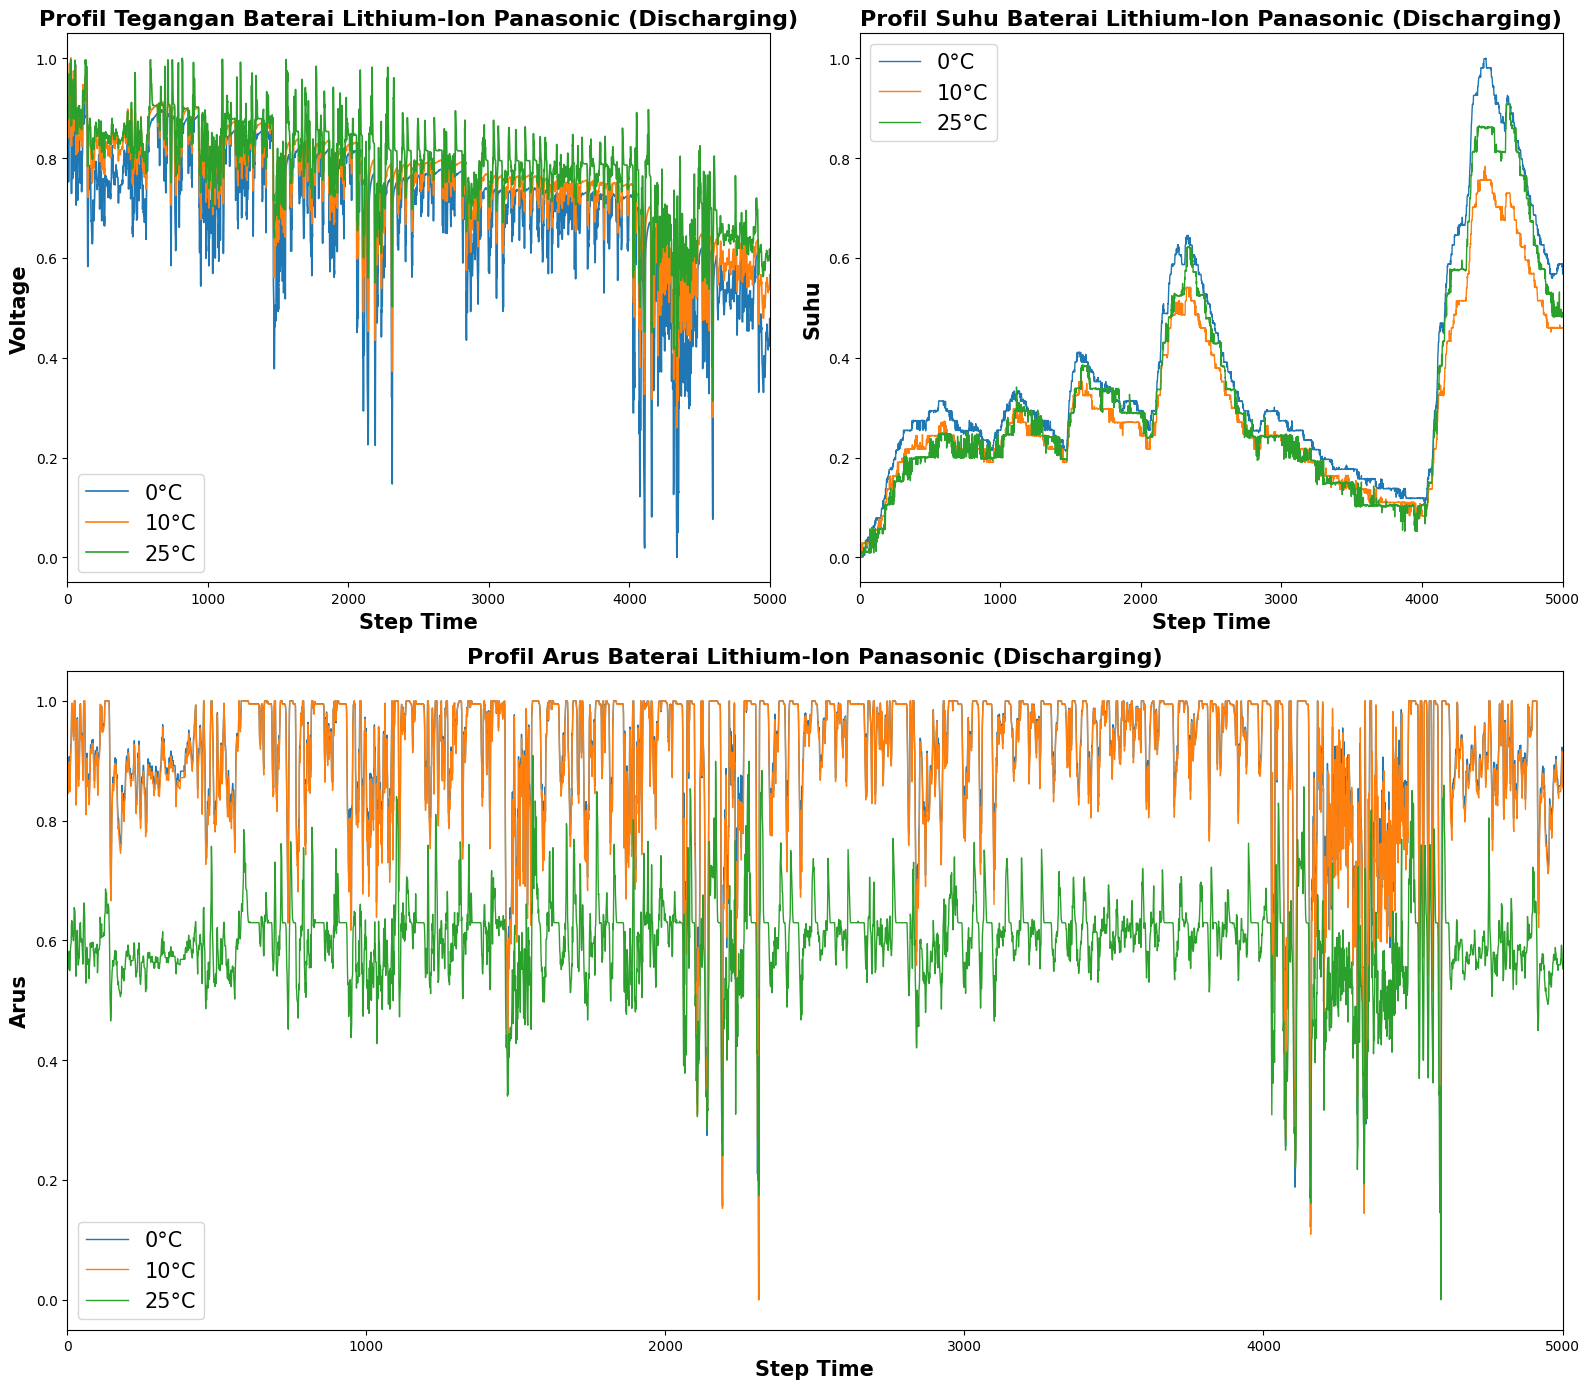

In [ ]:
dfs = [pd.read_csv(file_path) for file_path in file_paths]

combined_df = pd.concat(dfs)

fig = plt.figure(figsize=(16, 14))
gs = GridSpec(2, 2, height_ratios=[1, 1.2])  # Adjust height ratios to control subplot sizes

labels = ['0°C', '10°C', '25°C']

# Voltage plot
ax1 = fig.add_subplot(gs[0, 0])
for i, df in enumerate(dfs):
    ax1.plot(df['Step Time'], df['Voltage'], label=labels[i], linewidth=1.2)
ax1.set_ylabel('Voltage', fontsize=15, fontweight='bold')
ax1.set_xlabel('Step Time', fontsize=15, fontweight='bold')
ax1.set_title('Profil Tegangan Baterai Lithium-Ion Panasonic (Discharging)', fontsize=16, fontweight='bold')
ax1.legend(prop={'size': 15})
ax1.set_xlim(0, 5000)  # Menambahkan batas sumbu x

# Temperature plot
ax2 = fig.add_subplot(gs[0, 1])
for i, df in enumerate(dfs):
    ax2.plot(df['Step Time'], df['Temperature'], label=labels[i], linewidth=1)
ax2.set_ylabel('Suhu', fontsize=15, fontweight='bold')
ax2.set_xlabel('Step Time', fontsize=15, fontweight='bold')
ax2.set_title('Profil Suhu Baterai Lithium-Ion Panasonic (Discharging)', fontsize=16, fontweight='bold')
ax2.legend(prop={'size': 15})
ax2.set_xlim(0, 5000)  # Menambahkan batas sumbu x

# Current plot (center bottom)
ax3 = fig.add_subplot(gs[1, :])
for i, df in enumerate(dfs):
    ax3.plot(df['Step Time'], df['Current'], label=labels[i], linewidth=1)
ax3.set_xlabel('Step Time', fontsize=15, fontweight='bold')
ax3.set_ylabel('Arus', fontsize=15, fontweight='bold')
ax3.set_title('Profil Arus Baterai Lithium-Ion Panasonic (Discharging)', fontsize=16, fontweight='bold')
ax3.legend(prop={'size': 15})
ax3.set_xlim(0, 5000)  # Menambahkan batas sumbu x

plt.tight_layout()
plt.show()



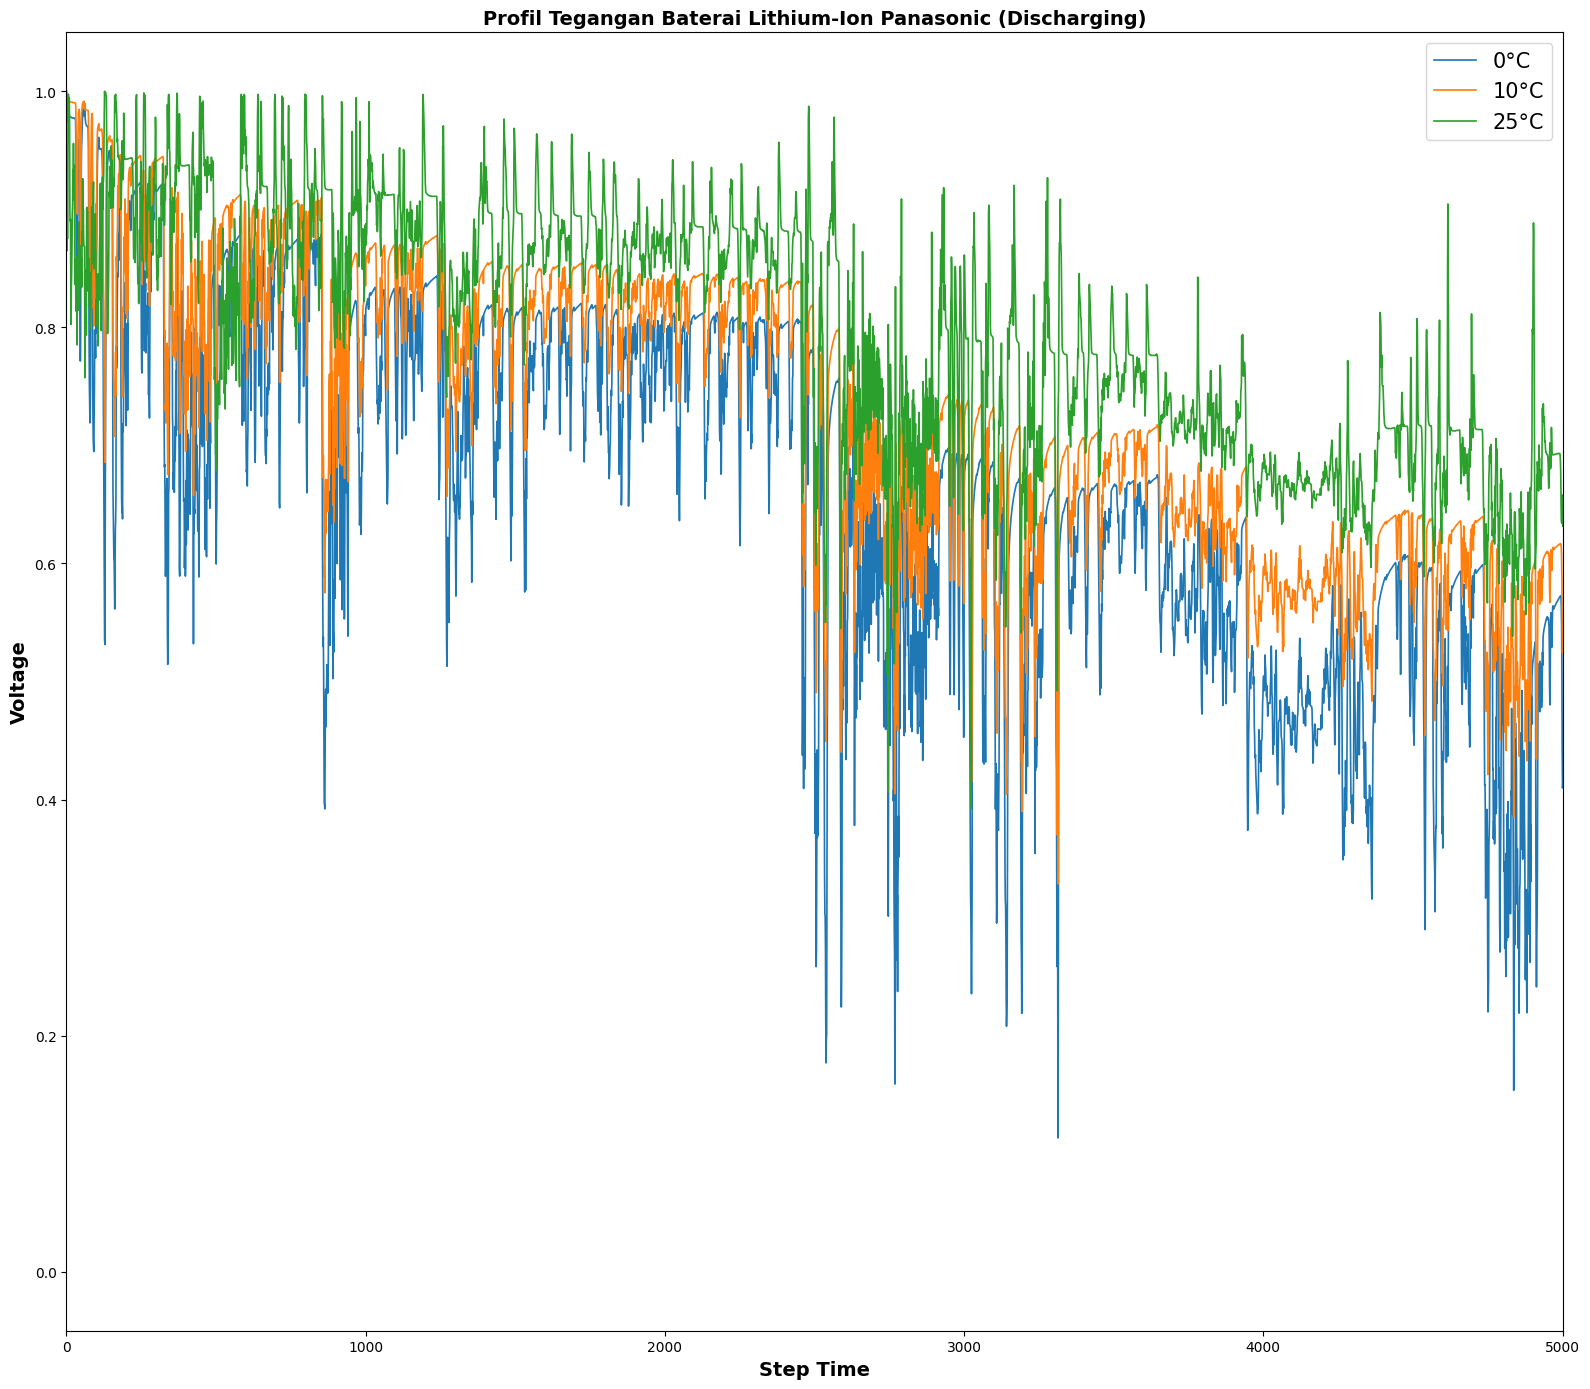

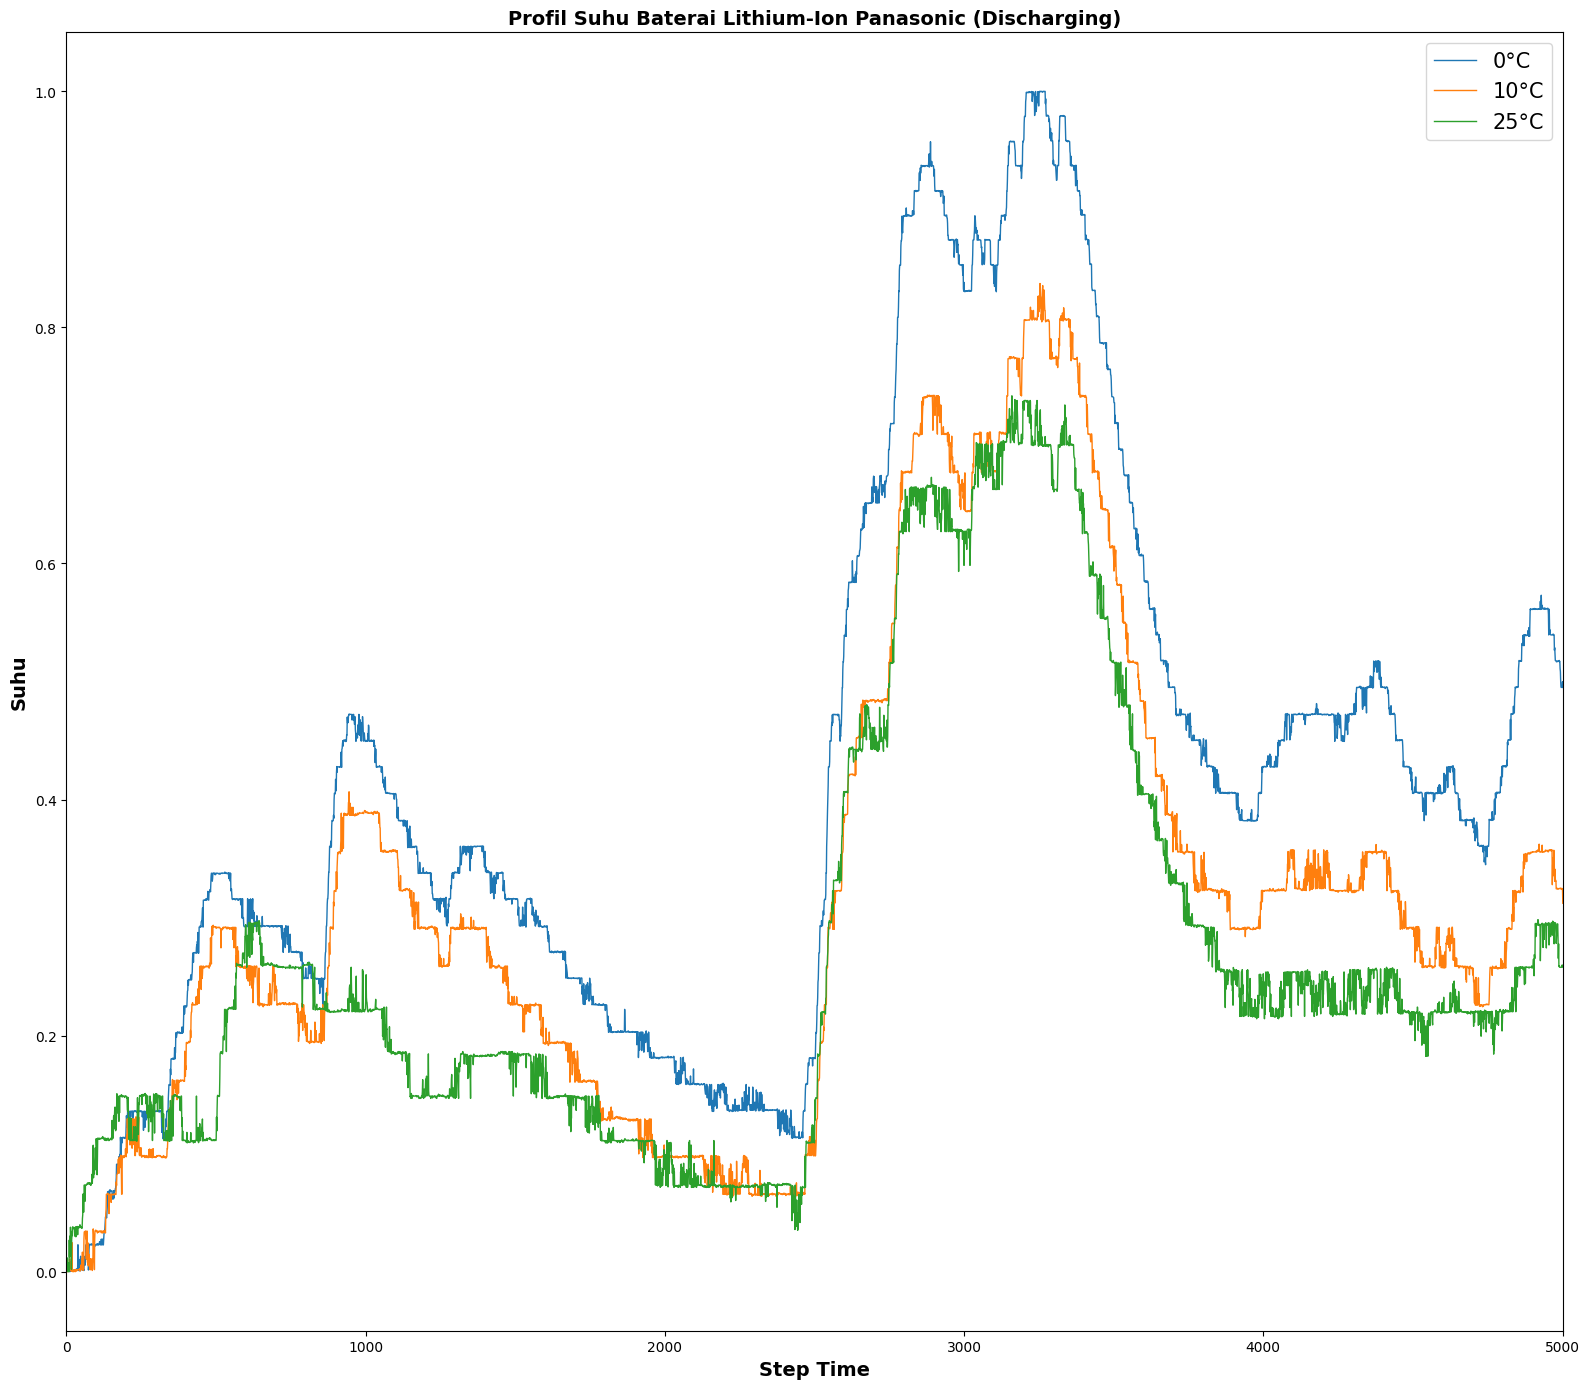

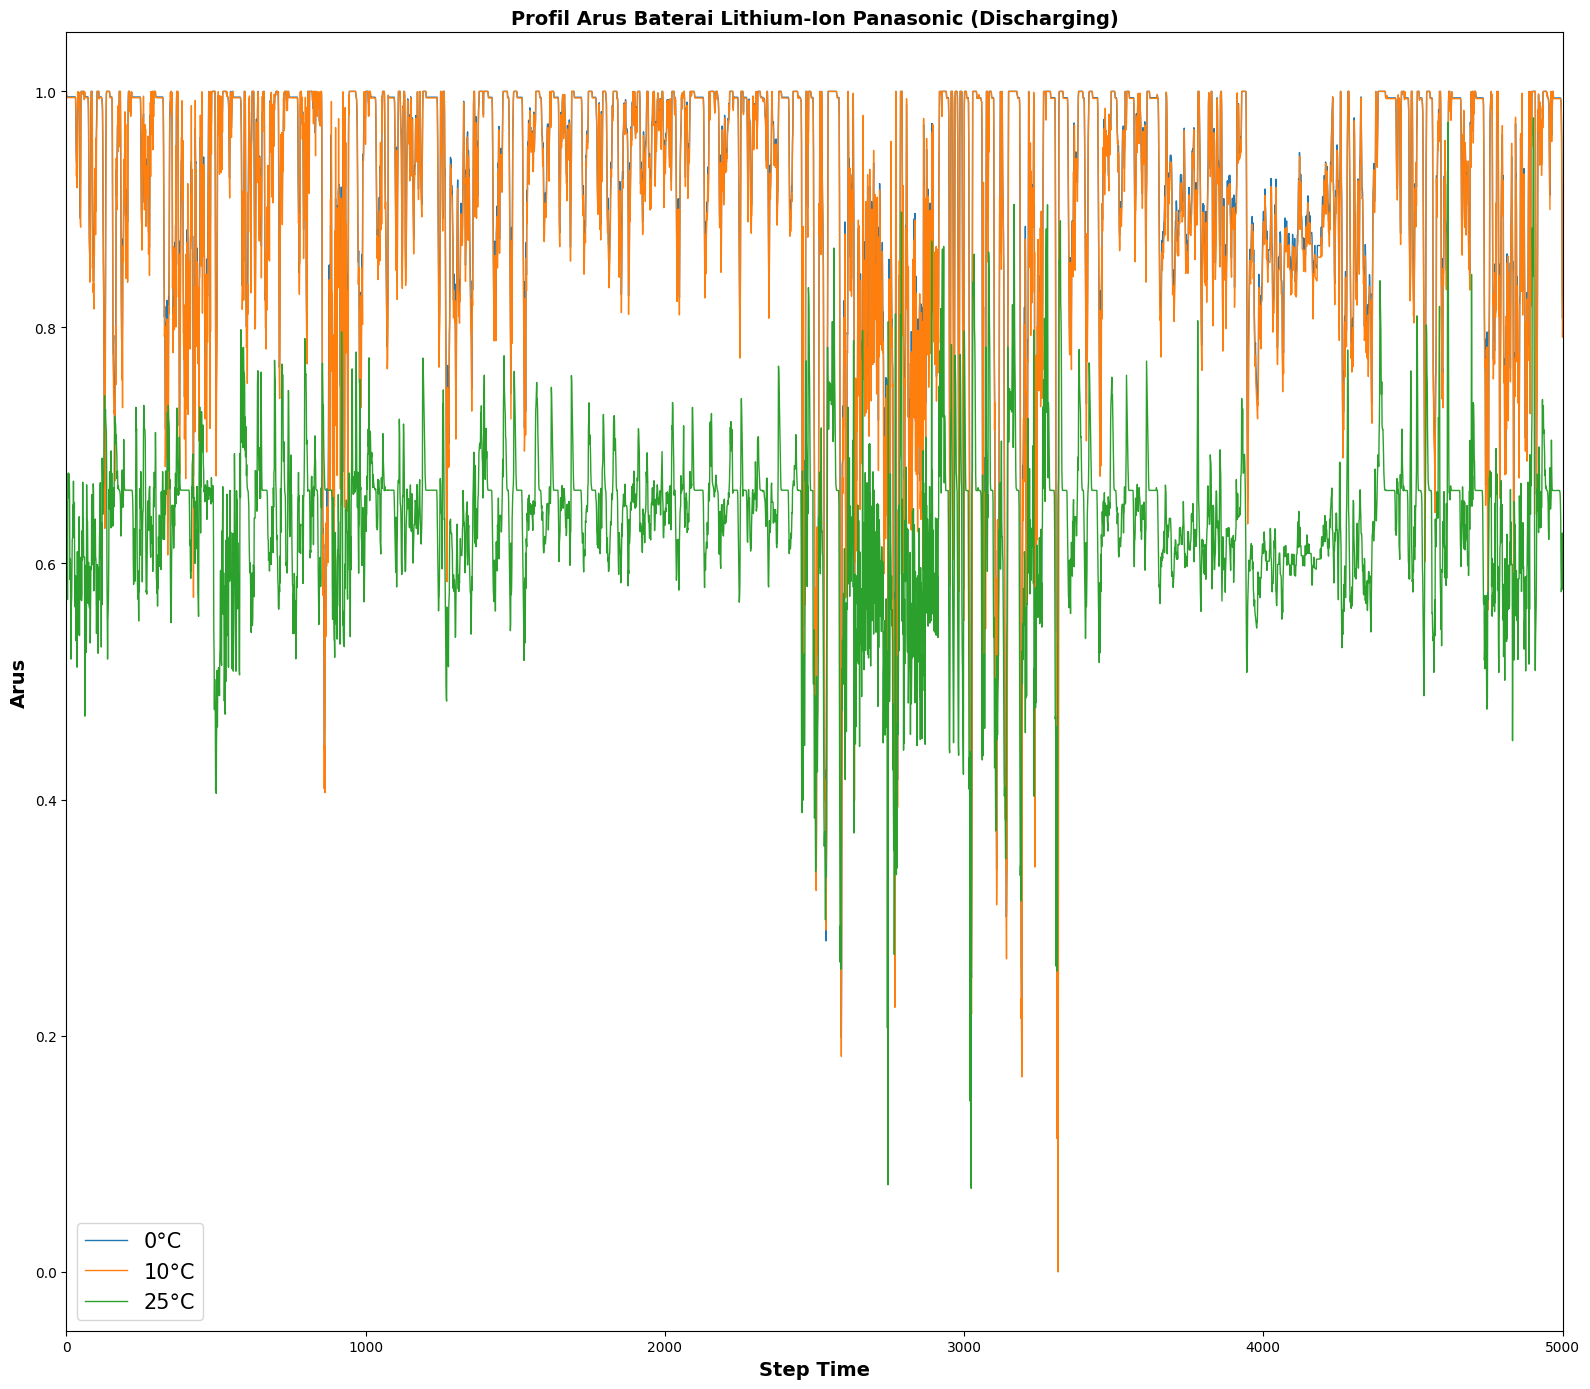

In [ ]:
dfs = [pd.read_csv(file_path) for file_path in file_paths]

combined_df = pd.concat(dfs)

labels = ['0°C', '10°C', '25°C']

# Voltage plot
fig1 = plt.figure(figsize=(16, 14))
ax1 = fig1.add_subplot(111)
for i, df in enumerate(dfs):
    ax1.plot(df['Step Time'], df['Voltage'], label=labels[i], linewidth=1.2)
ax1.set_ylabel('Voltage', fontsize=14, fontweight='bold')
ax1.set_xlabel('Step Time', fontsize=14, fontweight='bold')
ax1.set_title('Profil Tegangan Baterai Lithium-Ion Panasonic (Discharging)', fontsize=14, fontweight='bold')
ax1.legend(prop={'size': 15})
ax1.set_xlim(0, 5000) 
plt.tight_layout()
plt.show()

# Temperature plot
fig2 = plt.figure(figsize=(16, 14))
ax2 = fig2.add_subplot(111)
for i, df in enumerate(dfs):
    ax2.plot(df['Step Time'], df['Temperature'], label=labels[i], linewidth=1)
ax2.set_ylabel('Suhu', fontsize=14, fontweight='bold')
ax2.set_xlabel('Step Time', fontsize=14, fontweight='bold')
ax2.set_title('Profil Suhu Baterai Lithium-Ion Panasonic (Discharging)', fontsize=14, fontweight='bold')
ax2.legend(prop={'size': 15})
ax2.set_xlim(0, 5000)  
plt.tight_layout()
plt.show()

# Current plot
fig3 = plt.figure(figsize=(16, 14))
ax3 = fig3.add_subplot(111)
for i, df in enumerate(dfs):
    ax3.plot(df['Step Time'], df['Current'], label=labels[i], linewidth=1)
ax3.set_xlabel('Step Time', fontsize=14, fontweight='bold')
ax3.set_ylabel('Arus', fontsize=14, fontweight='bold')
ax3.set_title('Profil Arus Baterai Lithium-Ion Panasonic (Discharging)', fontsize=14, fontweight='bold')
ax3.legend(prop={'size': 15})
ax3.set_xlim(0, 5000)  
plt.tight_layout()
plt.show()


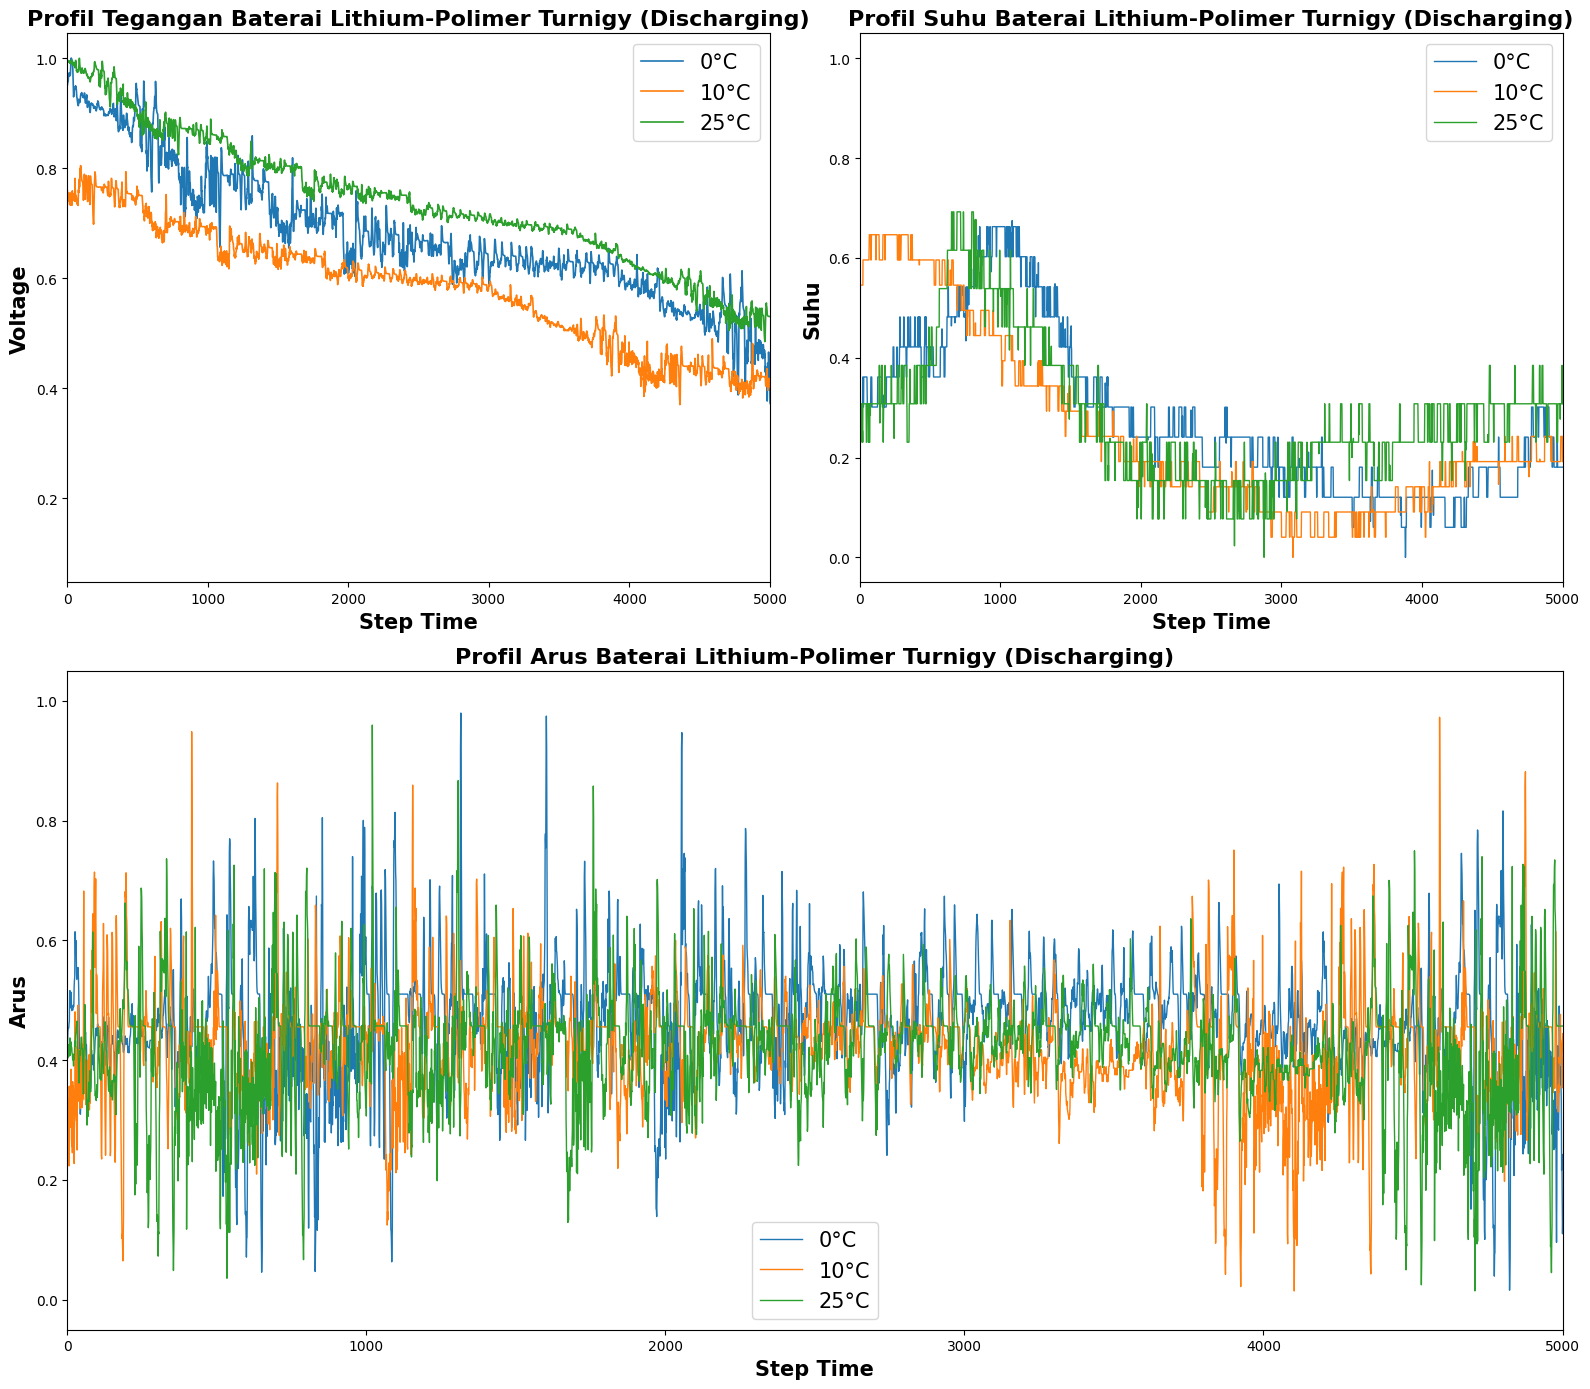

In [ ]:
dfs = [pd.read_csv(file_path) for file_path in file_paths]

combined_df = pd.concat(dfs)

fig = plt.figure(figsize=(16, 14))
gs = GridSpec(2, 2, height_ratios=[1, 1.2])  

labels = ['0°C', '10°C', '25°C']

# Voltage plot
ax1 = fig.add_subplot(gs[0, 0])
for i, df in enumerate(dfs):
    ax1.plot(df['Step Time'], df['Voltage'], label=labels[i], linewidth=1.2)
ax1.set_ylabel('Voltage', fontsize=15, fontweight='bold')
ax1.set_xlabel('Step Time', fontsize=15, fontweight='bold')
ax1.set_title('Profil Tegangan Baterai Lithium-Polimer Turnigy (Discharging)', fontsize=16, fontweight='bold')
ax1.legend(prop={'size': 15})
ax1.set_xlim(0, 5000)  

# Temperature plot
ax2 = fig.add_subplot(gs[0, 1])
for i, df in enumerate(dfs):
    ax2.plot(df['Step Time'], df['Temperature'], label=labels[i], linewidth=1)
ax2.set_ylabel('Suhu', fontsize=15, fontweight='bold')
ax2.set_xlabel('Step Time', fontsize=15, fontweight='bold')
ax2.set_title('Profil Suhu Baterai Lithium-Polimer Turnigy (Discharging)', fontsize=16, fontweight='bold')
ax2.legend(prop={'size': 15})
ax2.set_xlim(0, 5000)  

# Current plot 
ax3 = fig.add_subplot(gs[1, :])
for i, df in enumerate(dfs):
    ax3.plot(df['Step Time'], df['Current'], label=labels[i], linewidth=1)
ax3.set_xlabel('Step Time', fontsize=15, fontweight='bold')
ax3.set_ylabel('Arus', fontsize=15, fontweight='bold')
ax3.set_title('Profil Arus Baterai Lithium-Polimer Turnigy (Discharging)', fontsize=16, fontweight='bold')
ax3.legend(prop={'size': 15})
ax3.set_xlim(0, 5000)  

plt.tight_layout()
plt.show()


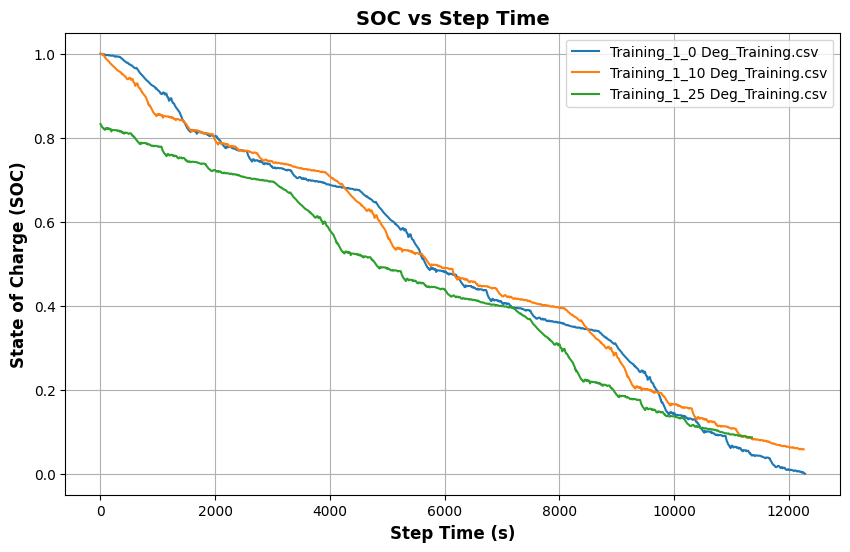

In [ ]:
file_paths = [
    r'C:\Users\Acer\Documents\Bismillah Skripsi\Kodingan Untuk Skripsi\Turnigy lithium polimer\Training dan Testing\Training_1_0 Deg_Training.csv',
    r'C:\Users\Acer\Documents\Bismillah Skripsi\Kodingan Untuk Skripsi\Turnigy lithium polimer\Training dan Testing\Training_1_10 Deg_Training.csv',
    r'C:\Users\Acer\Documents\Bismillah Skripsi\Kodingan Untuk Skripsi\Turnigy lithium polimer\Training dan Testing\Training_1_25 Deg_Training.csv'
]


def plot_soc_from_csv(file_paths):
    plt.figure(figsize=(10, 6))
    for file_path in file_paths:
        df = pd.read_csv(file_path)
        plt.plot(df['Step Time'], df['SOC'], label=file_path.split("\\")[-1])

    plt.xlabel('Step Time (s)', fontsize=12, fontweight='bold')
    plt.ylabel('State of Charge (SOC)', fontsize=12, fontweight='bold')
    plt.title('SOC vs Step Time', fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_soc_from_csv(file_paths)

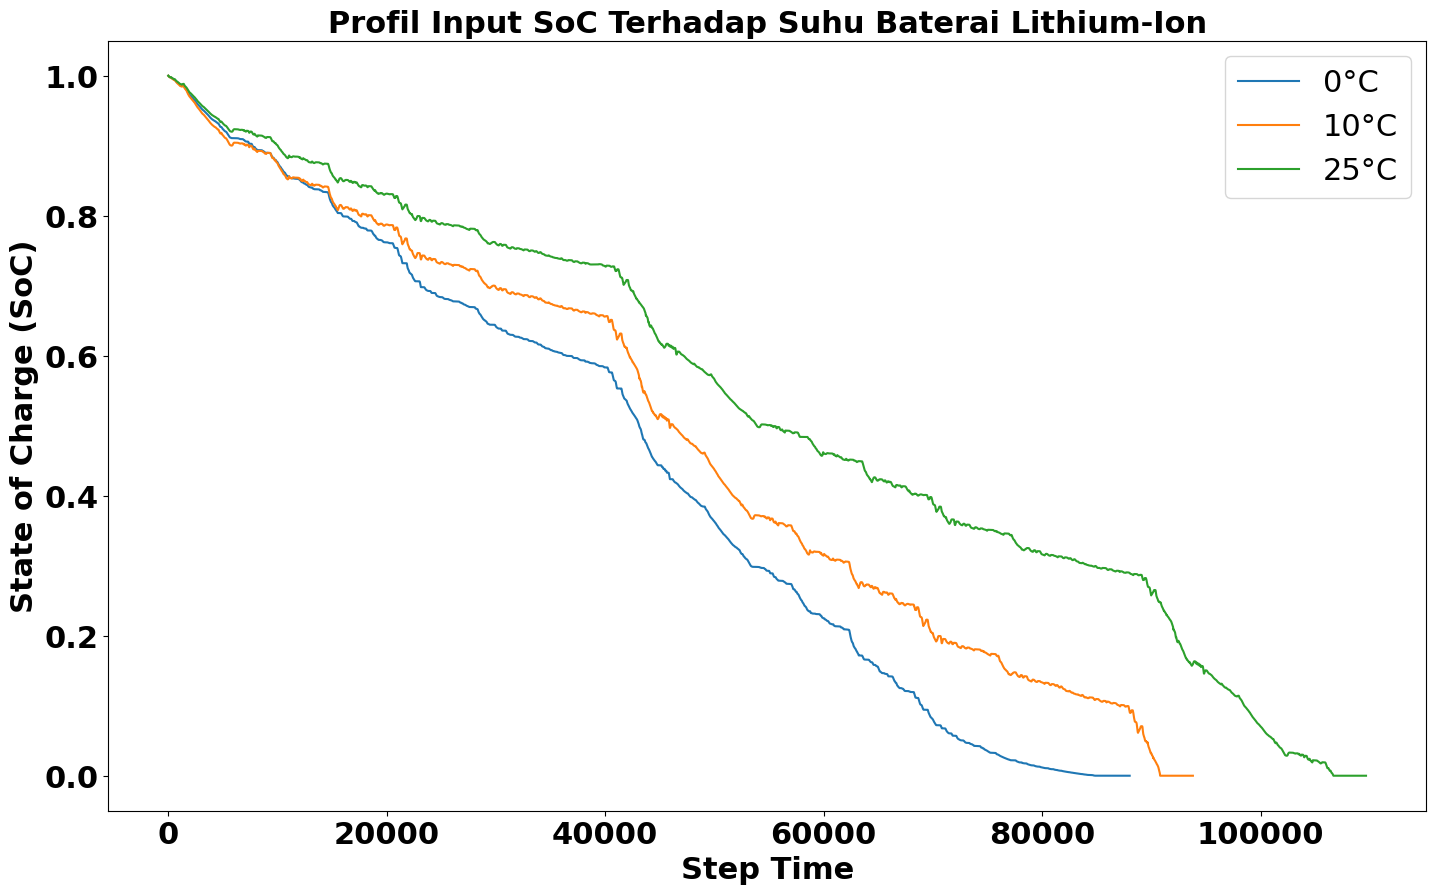

In [ ]:
def plot_soc_from_csv(file_paths):
    plt.figure(figsize=(17, 10))
    labels = ['0°C', '10°C', '25°C']  
    for i, file_path in enumerate(file_paths):
        df = pd.read_csv(file_path)
        plt.plot(df['Step Time'], df['SOC'], label=labels[i])

    plt.xlabel('Step Time', fontsize=22, fontweight='bold')
    plt.ylabel('State of Charge (SoC)', fontsize=22, fontweight='bold')
    plt.title('Profil Input SoC Terhadap Suhu Baterai Lithium-Ion', fontsize=22, fontweight='bold')
    plt.legend(prop={'size': 22})  #
    plt.xticks(fontsize=22, fontweight='bold')  
    plt.yticks(fontsize=22, fontweight='bold')  
    plt.show()

plot_soc_from_csv(file_paths)

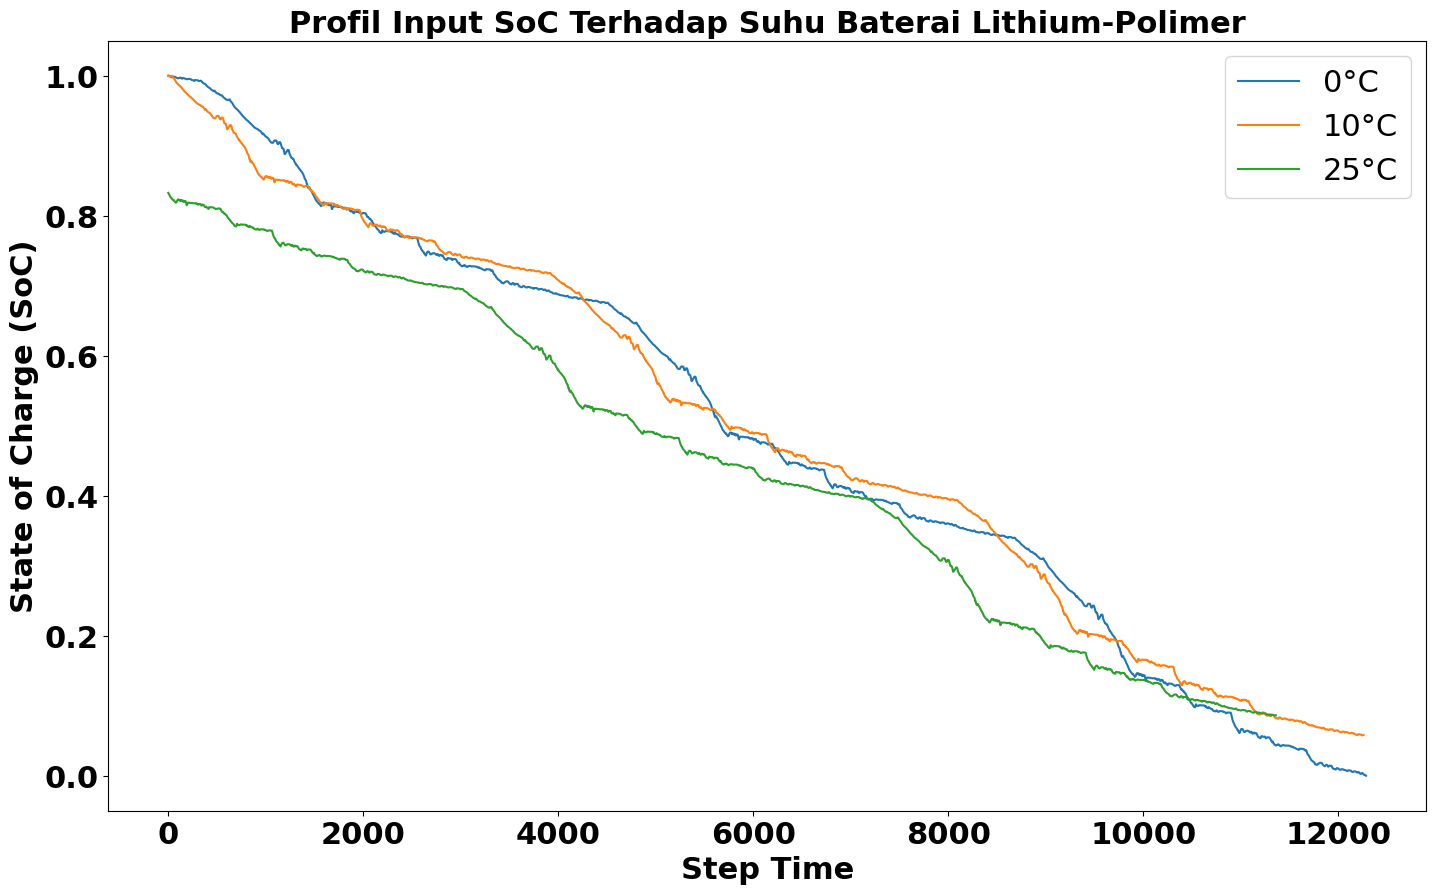

In [ ]:
def plot_soc_from_csv(file_paths):
    plt.figure(figsize=(17, 10))
    labels = ['0°C', '10°C', '25°C']  
    for i, file_path in enumerate(file_paths):
        df = pd.read_csv(file_path)
        plt.plot(df['Step Time'], df['SOC'], label=labels[i])

    plt.xlabel('Step Time', fontsize=22, fontweight='bold')
    plt.ylabel('State of Charge (SoC)', fontsize=22, fontweight='bold')
    plt.title('Profil Input SoC Terhadap Suhu Baterai Lithium-Polimer', fontsize=22, fontweight='bold')
    plt.legend(prop={'size': 22}) 
    plt.xticks(fontsize=22, fontweight='bold')  
    plt.yticks(fontsize=22, fontweight='bold')  
    plt.show()


plot_soc_from_csv(file_paths)

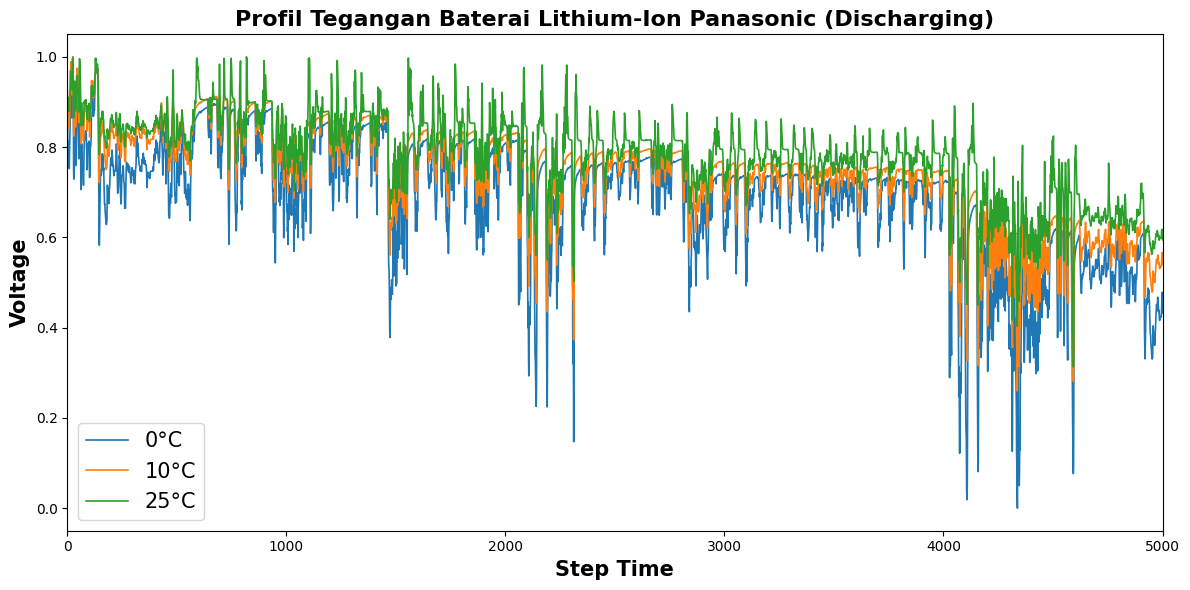

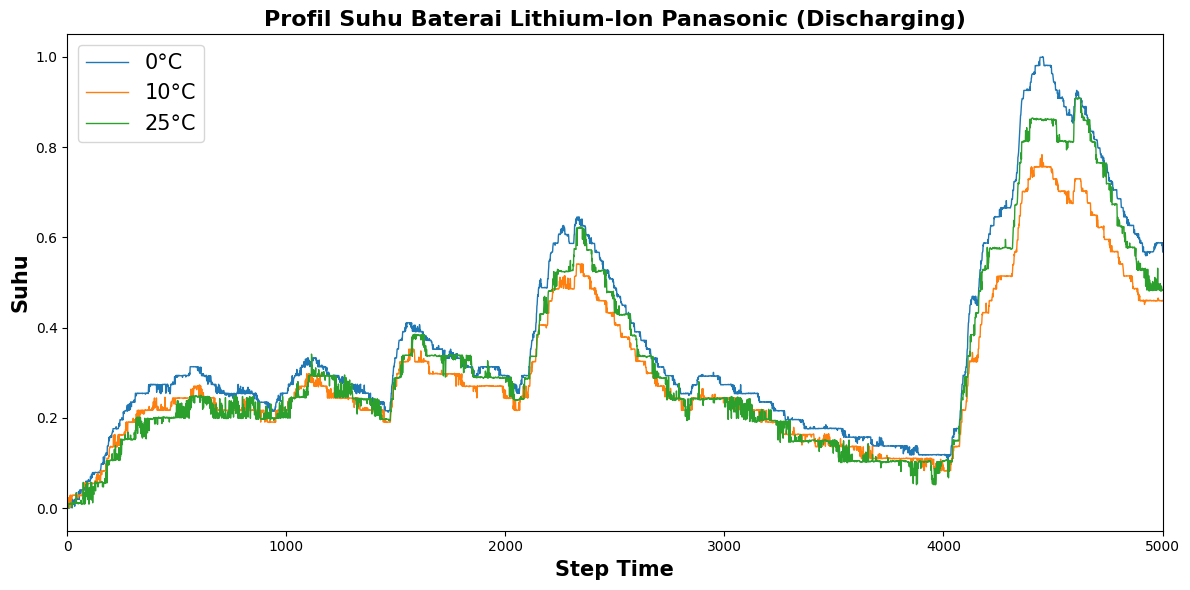

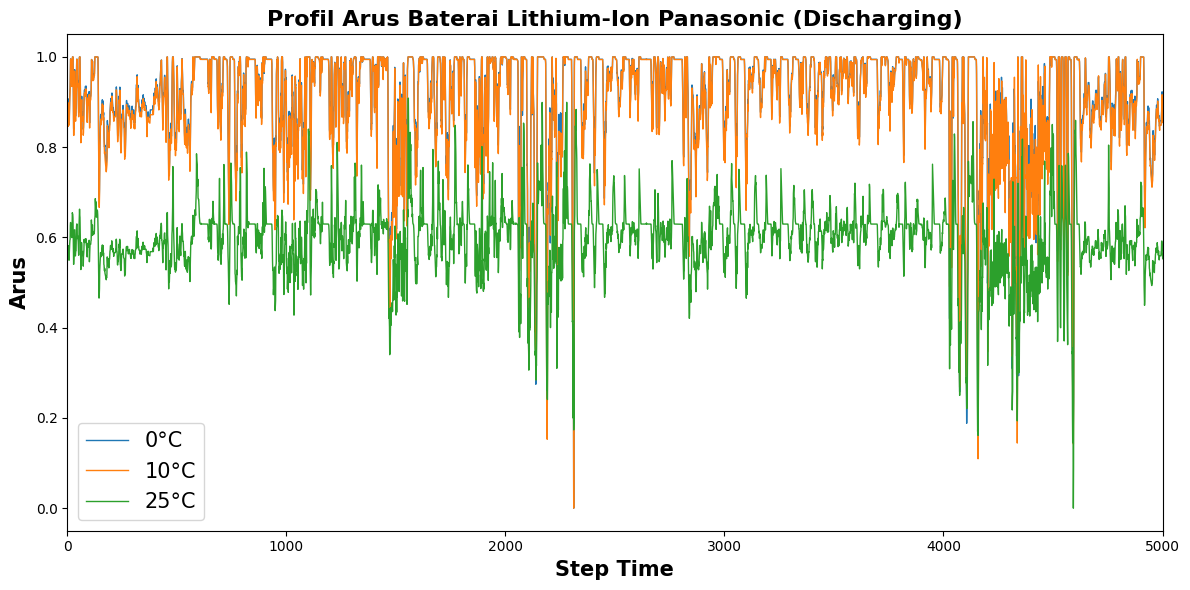

In [ ]:
dfs = [pd.read_csv(file_path) for file_path in file_paths]

# Labels
labels = ['0°C', '10°C', '25°C']

# Voltage plot
plt.figure(figsize=(12, 6))
for i, df in enumerate(dfs):
    plt.plot(df['Step Time'], df['Voltage'], label=labels[i], linewidth=1.2)
plt.ylabel('Voltage', fontsize=15, fontweight='bold')
plt.xlabel('Step Time', fontsize=15, fontweight='bold')
plt.title('Profil Tegangan Baterai Lithium-Ion Panasonic (Discharging)', fontsize=16, fontweight='bold')
plt.legend(prop={'size': 15})
plt.xlim(0, 5000)  
plt.tight_layout()
plt.show()

# Temperature plot
plt.figure(figsize=(12, 6))
for i, df in enumerate(dfs):
    plt.plot(df['Step Time'], df['Temperature'], label=labels[i], linewidth=1)
plt.ylabel('Suhu', fontsize=15, fontweight='bold')
plt.xlabel('Step Time', fontsize=15, fontweight='bold')
plt.title('Profil Suhu Baterai Lithium-Ion Panasonic (Discharging)', fontsize=16, fontweight='bold')
plt.legend(prop={'size': 15})
plt.xlim(0, 5000)  
plt.tight_layout()
plt.show()

# Current plot
plt.figure(figsize=(12, 6))
for i, df in enumerate(dfs):
    plt.plot(df['Step Time'], df['Current'], label=labels[i], linewidth=1)
plt.xlabel('Step Time', fontsize=15, fontweight='bold')
plt.ylabel('Arus', fontsize=15, fontweight='bold')
plt.title('Profil Arus Baterai Lithium-Ion Panasonic (Discharging)', fontsize=16, fontweight='bold')
plt.legend(prop={'size': 15})
plt.xlim(0, 5000)  
plt.tight_layout()
plt.show()



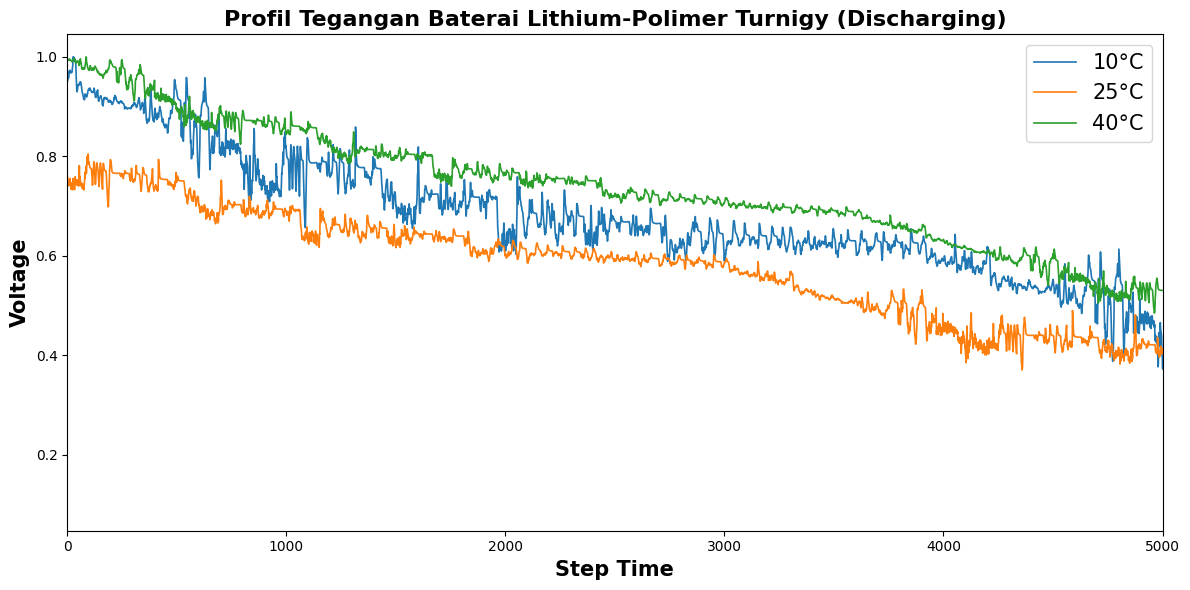

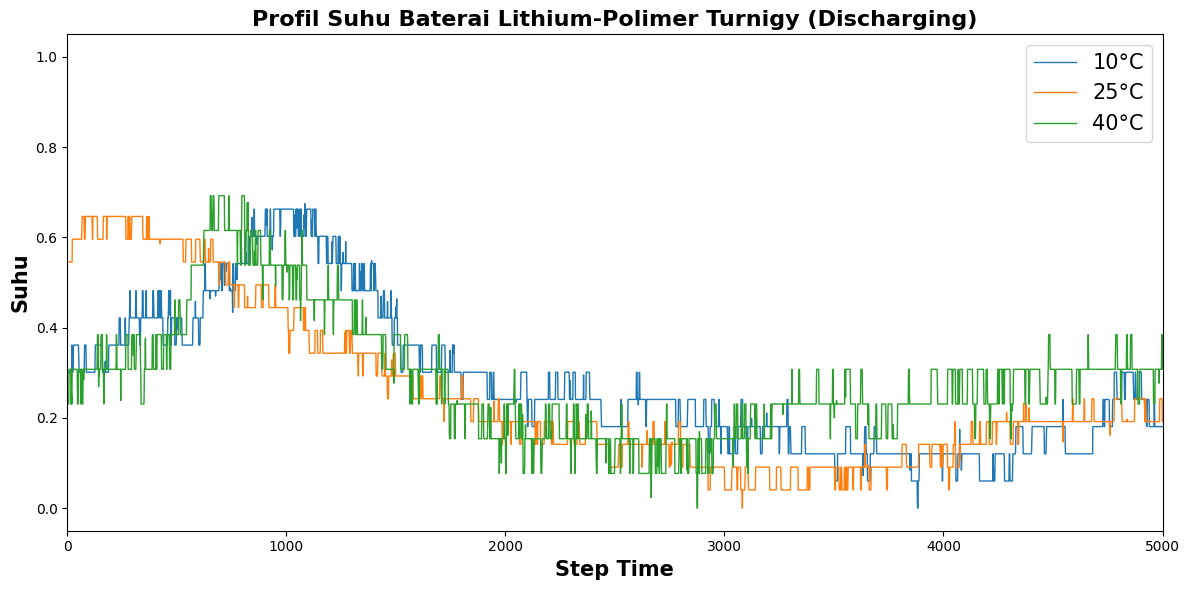

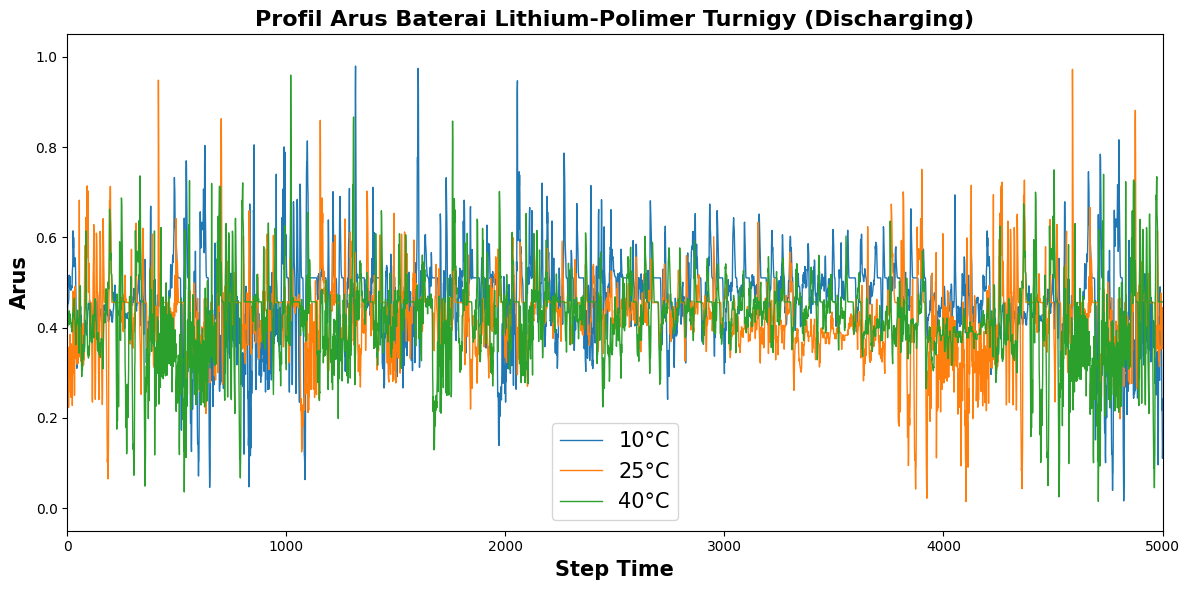

In [ ]:
dfs = [pd.read_csv(file_path) for file_path in file_paths]

labels = ['10°C', '25°C', '40°C']

# Voltage plot
plt.figure(figsize=(12, 6))
for i, df in enumerate(dfs):
    plt.plot(df['Step Time'], df['Voltage'], label=labels[i], linewidth=1.2)
plt.ylabel('Voltage', fontsize=15, fontweight='bold')
plt.xlabel('Step Time', fontsize=15, fontweight='bold')
plt.title('Profil Tegangan Baterai Lithium-Polimer Turnigy (Discharging)', fontsize=16, fontweight='bold')
plt.legend(prop={'size': 15})
plt.xlim(0, 5000)  
plt.tight_layout()
plt.show()

# Temperature plot
plt.figure(figsize=(12, 6))
for i, df in enumerate(dfs):
    plt.plot(df['Step Time'], df['Temperature'], label=labels[i], linewidth=1)
plt.ylabel('Suhu', fontsize=15, fontweight='bold')
plt.xlabel('Step Time', fontsize=15, fontweight='bold')
plt.title('Profil Suhu Baterai Lithium-Polimer Turnigy (Discharging)', fontsize=16, fontweight='bold')
plt.legend(prop={'size': 15})
plt.xlim(0, 5000)  
plt.tight_layout()
plt.show()

# Current plot
plt.figure(figsize=(12, 6))
for i, df in enumerate(dfs):
    plt.plot(df['Step Time'], df['Current'], label=labels[i], linewidth=1)
plt.xlabel('Step Time', fontsize=15, fontweight='bold')
plt.ylabel('Arus', fontsize=15, fontweight='bold')
plt.title('Profil Arus Baterai Lithium-Polimer Turnigy (Discharging)', fontsize=16, fontweight='bold')
plt.legend(prop={'size': 15})
plt.xlim(0, 5000)  
plt.tight_layout()
plt.show()